# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
arquivo = pd.read_csv('housing.csv')
arquivo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [61]:
arquivo.dropna(subset=['total_bedrooms'], inplace=True)

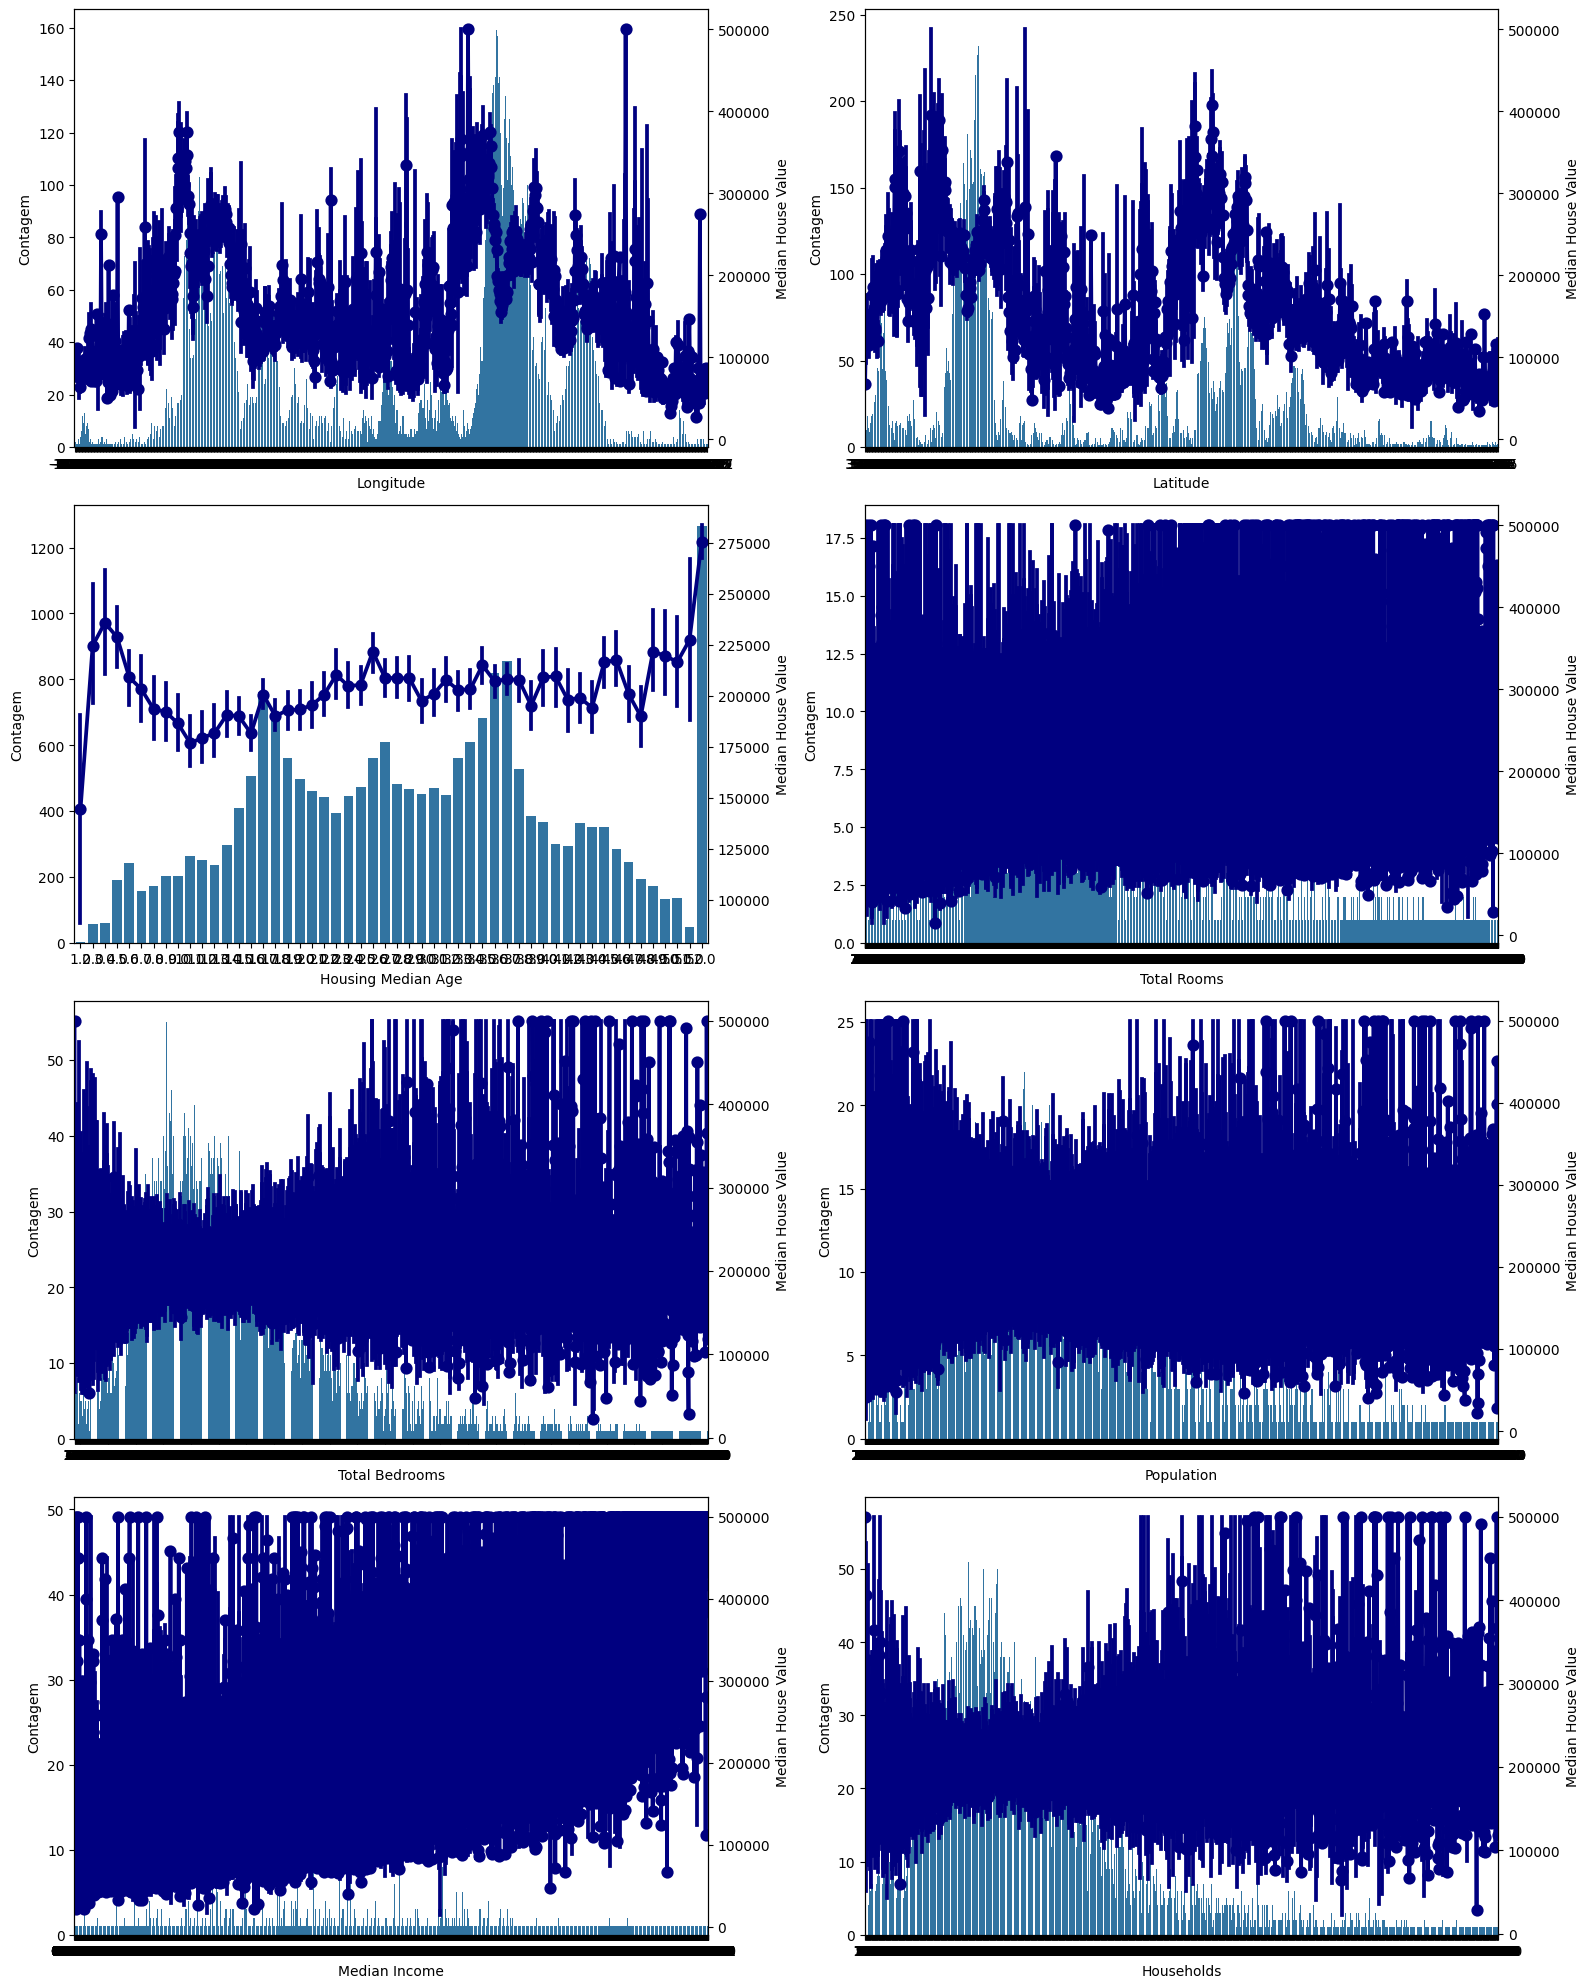

In [63]:
# Configuração do gráfico
plt.rc('figure', figsize=(16, 20))  # Ajustando o tamanho da figura para 4 linhas e 2 colunas
fig, axes = plt.subplots(4, 2)

# Gráfico 1
ax1 = axes[0, 0]
sns.countplot(x="longitude", data=arquivo, dodge=True, ax=ax1)
ax1.set_ylabel("Contagem")
ax1.set_xlabel("Longitude")
ax1b = ax1.twinx()
sns.pointplot(x="longitude", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax1b)
ax1b.set_ylabel("Median House Value")

# Gráfico 2
ax2 = axes[0, 1]
sns.countplot(x="latitude", data=arquivo, dodge=True, ax=ax2)
ax2.set_ylabel("Contagem")
ax2.set_xlabel("Latitude")
ax2b = ax2.twinx()
sns.pointplot(x="latitude", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax2b)
ax2b.set_ylabel("Median House Value")

# Gráfico 3
ax3 = axes[1, 0]
sns.countplot(x="housing_median_age", data=arquivo, dodge=True, ax=ax3)
ax3.set_ylabel("Contagem")
ax3.set_xlabel("Housing Median Age")
ax3b = ax3.twinx()
sns.pointplot(x="housing_median_age", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax3b)
ax3b.set_ylabel("Median House Value")

# Gráfico 4
ax4 = axes[1, 1]
sns.countplot(x="total_rooms", data=arquivo, dodge=True, ax=ax4)
ax4.set_ylabel("Contagem")
ax4.set_xlabel("Total Rooms")
ax4b = ax4.twinx()
sns.pointplot(x="total_rooms", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax4b)
ax4b.set_ylabel("Median House Value")

# Gráfico 5
ax5 = axes[2, 0]
sns.countplot(x="total_bedrooms", data=arquivo, dodge=True, ax=ax5)
ax5.set_ylabel("Contagem")
ax5.set_xlabel("Total Bedrooms")
ax5b = ax5.twinx()
sns.pointplot(x="total_bedrooms", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax5b)
ax5b.set_ylabel("Median House Value")

# Gráfico 6
ax6 = axes[2, 1]
sns.countplot(x="population", data=arquivo, dodge=True, ax=ax6)
ax6.set_ylabel("Contagem")
ax6.set_xlabel("Population")
ax6b = ax6.twinx()
sns.pointplot(x="population", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax6b)
ax6b.set_ylabel("Median House Value")

# Gráfico 7
ax7 = axes[3, 0]
sns.countplot(x="median_income", data=arquivo, dodge=True, ax=ax7)
ax7.set_ylabel("Contagem")
ax7.set_xlabel("Median Income")
ax7b = ax7.twinx()
sns.pointplot(x="median_income", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax7b)
ax7b.set_ylabel("Median House Value")

# Gráfico 8
ax8 = axes[3, 1]
sns.countplot(x="households", data=arquivo, dodge=True, ax=ax8)
ax8.set_ylabel("Contagem")
ax8.set_xlabel("Households")
ax8b = ax8.twinx()
sns.pointplot(x="households", y="median_house_value", data=arquivo, dodge=True, errorbar=('ci', 95), color='navy', ax=ax8b)
ax8b.set_ylabel("Median House Value")

# Ajustando o layout
plt.tight_layout()
plt.show()


### 3. Separe os dados em validação e teste

In [26]:
X = arquivo.drop(columns = ['median_house_value']).copy()

X = pd.get_dummies(X, 
                   drop_first = True)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [32]:
y = arquivo.loc[:,'median_house_value']
y.head().to_frame()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [36]:
tree_1 = DecisionTreeRegressor(max_depth=8)
tree_2 = DecisionTreeRegressor(max_depth=2)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [46]:
y_pred_tree_1 = tree_1.predict(X_test)
y_pred_tree_2 = tree_2.predict(X_test)

mse_tree_1 = mean_squared_error(y_test, y_pred_tree_1)
mse_tree_2 = mean_squared_error(y_test, y_pred_tree_2)

print(f'MSE from tree_1, with max_depth 8, its {mse_tree_1}.')
print(f'MSE from tree_2, with max_depth 2, its {mse_tree_2}.')

MSE from tree_1, with max_depth 8, its 4004931451.0.
MSE from tree_2, with max_depth 2, its 6594347609.0.


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

The deeper tree (tree_1) performed better on the test set — it made fewer predictions.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

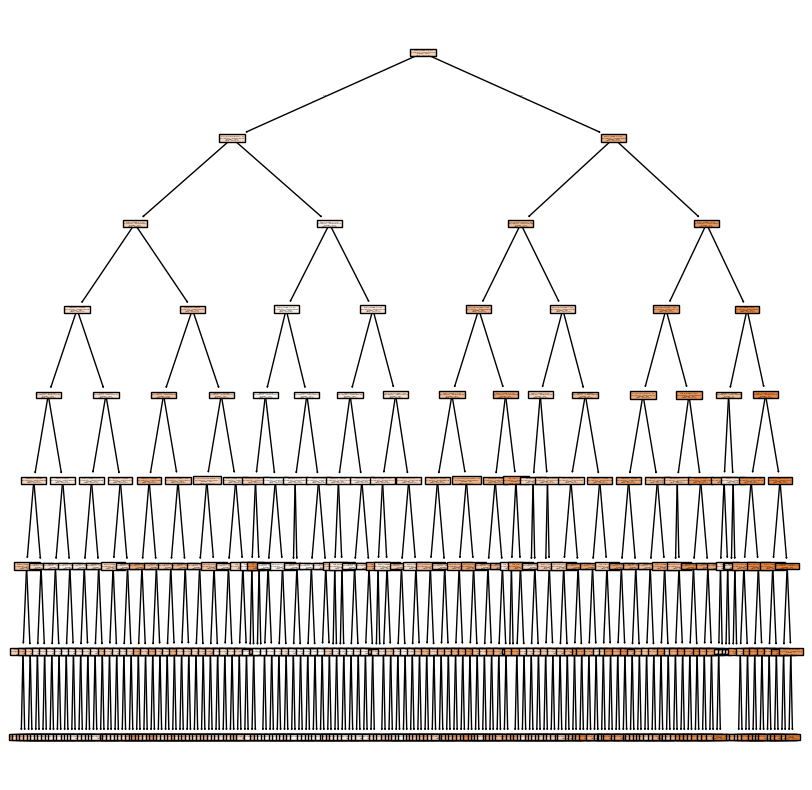

In [57]:
plt.rc('figure', figsize=(10,10))
tp = tree.plot_tree(tree_1,
                    feature_names=X.columns,
                    filled=True)
plt.show()

In [59]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_1, 
                           out_file=None, 
                           feature_names=X.columns,
                           filled=True, 
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("tree_visualization", format="pdf", cleanup=True)

'tree_visualization.pdf'